# NAIVE BAYES classification! 

In [20]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv("Iris.csv")

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.sample

<bound method NDFrame.sample of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Text(0.5, 1.0, 'Distribution of all features of all categories')

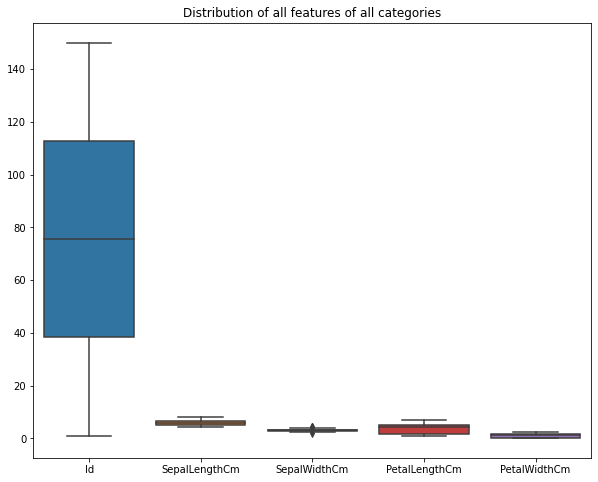

In [16]:
plt.subplots(figsize=(10,8))
sb.boxplot(data = data).set_title("Distribution of all features of all categories")

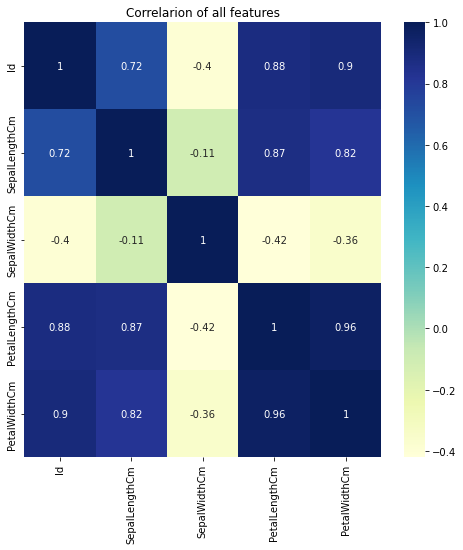

In [17]:
plt.subplots(figsize = (8,8))
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu").set_title("Correlarion of all features")
plt.show()

In [18]:
x = data.iloc[:,0:4].values
y = data.iloc[:, 4].values

In [22]:
LE = LabelEncoder()
y = LE.fit_transform(y)
y

array([ 1,  1,  1,  1,  1,  3,  2,  1,  1,  0,  1,  1,  0,  0,  1,  3,  3,
        2,  2,  2,  1,  3,  1,  4,  1,  1,  3,  1,  1,  1,  1,  3,  0,  1,
        0,  1,  1,  0,  1,  1,  2,  2,  1,  5,  3,  2,  1,  1,  1,  1, 10,
       11, 11,  9, 11,  9, 12,  6,  9, 10,  6, 11,  6, 10,  9, 10, 11,  6,
       11,  7, 14,  9, 11,  8,  9, 10, 10, 13, 11,  6,  7,  6,  8, 12, 11,
       12, 11,  9,  9,  9,  8, 10,  8,  6,  9,  8,  9,  9,  7,  9, 21, 15,
       17, 14, 18, 17, 13, 14, 14, 21, 16, 15, 17, 16, 20, 19, 14, 18, 19,
       11, 19, 16, 16, 14, 17, 14, 14, 14, 17, 12, 15, 16, 18, 11, 10, 19,
       20, 14, 14, 17, 20, 19, 15, 19, 21, 19, 15, 16, 19, 14],
      dtype=int64)

In [23]:
# imports: 

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(f"Training data size: x = {x_train.shape} ,y = {y_train.shape}")
print(f"Testing data size: x = {x_test.shape} ,y = {y_test.shape}")

Training data size: x = (105, 4) ,y = (105,)
Testing data size: x = (45, 4) ,y = (45,)


In [31]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred = GNB.predict(x_test) 
accuracy_nb=round(accuracy_score(y_test,y_pred)* 100, 2)
#acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

In [32]:
print(cm)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 4 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 2 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 2 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [33]:
print("***********Naive Bayes********")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")      

***********Naive Bayes********
Accuracy: 0.28888888888888886
Precision: 0.28888888888888886
Recall: 0.28888888888888886
F1-score: 0.28888888888888886
